# Sales Performance Analytics — Day 2
## KPI Calculation & Visualization
**Internship Task | Data Science**

**Objective:** Calculate all 6 business development KPIs from the cleaned dataset and visualize them using Python charts. Outputs will be used to build the Power BI dashboard.

### KPIs to Calculate:
1. Lead Conversion Rate
2. Customer Acquisition Cost (CAC)
3. Revenue per Client
4. Monthly Growth Rate
5. Sales Cycle Duration
6. Lead Source Performance

In [3]:
# ─────────────────────────────────────────
# Import Libraries
# ─────────────────────────────────────────

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as mticker
import seaborn as sns
import warnings

warnings.filterwarnings('ignore')

# Plot styling
plt.rcParams.update({
    'figure.dpi'      : 150,
    'axes.spines.top' : False,
    'axes.spines.right': False,
    'font.family'     : 'DejaVu Sans',
    'axes.titlesize'  : 13,
    'axes.titleweight': 'bold'
})

sns.set_palette("Set2")

pd.set_option('display.float_format', '{:.2f}'.format)

print("Libraries imported successfully")

Libraries imported successfully


In [4]:
# ─────────────────────────────────────────
# Load Cleaned Dataset
# ─────────────────────────────────────────

df = pd.read_csv('../data/cleaned/BD_KPI_Cleaned_Dataset.csv',
                 parse_dates=['Lead_Date', 'Conversion_Date'])

# Restore period column
df['Lead_Month'] = df['Lead_Date'].dt.to_period('M')

print(f"Cleaned dataset loaded")
print(f"   Shape  : {df.shape}")
print(f"   Columns: {df.columns}")
print(f"\nFirst 10 rows:")
df.head(10)

Cleaned dataset loaded
   Shape  : (683, 13)
   Columns: Index(['Lead_ID', 'Lead_Source', 'Lead_Date', 'Conversion_Status',
       'Conversion_Date', 'Revenue_Value', 'Marketing_Cost',
       'Sales_Representative', 'Region', 'Sales_Cycle_Days', 'Lead_Month',
       'Lead_Year', 'Is_Converted'],
      dtype='object')

First 10 rows:


,Lead_ID,Lead_Source,Lead_Date,Conversion_Status,Conversion_Date,Revenue_Value,Marketing_Cost,Sales_Representative,Region,Sales_Cycle_Days,Lead_Month,Lead_Year,Is_Converted
0,LEAD-0043,Referral,2024-04-02,Not Converted,NaT,0.00,3036.10,David Brown,East,NaN,2024-04,2024,0
1,LEAD-0199,Referral,2024-02-07,Converted,2024-06-06,10390.10,2639.44,Unassigned,West,120.00,2024-02,2024,1
2,LEAD-0526,Email Campaign,2023-02-11,Not Converted,NaT,0.00,3021.93,David Brown,West,NaN,2023-02,2023,0
3,LEAD-0638,Email Campaign,2023-09-09,Not Converted,NaT,0.00,2639.44,David Brown,South,NaN,2023-09,2023,0
4,LEAD-0067,Website,2023-04-29,Not Converted,NaT,0.00,2095.58,Unassigned,East,NaN,2023-04,2023,0
5,LEAD-0130,Email Campaign,2023-10-01,Not Converted,NaT,0.00,4120.59,Alice Johnson,North,NaN,2023-10,2023,0
6,LEAD-0567,Social Media,2024-06-22,Converted,2024-08-15,12684.79,1676.86,Alice Johnson,South,54.00,2024-06,2024,1
7,LEAD-0626,Referral,2024-03-09,Not Converted,NaT,0.00,3148.67,Unassigned,North,NaN,2024-03,2024,0
8,LEAD-0680,Direct,2024-03-22,Not Converted,NaT,0.00,3497.45,Unassigned,West,NaN,2024-03,2024,0
9,LEAD-0155,Direct,2023-09-28,Converted,2023-10-23,14310.82,4912.19,Unassigned,East,25.00,2023-09,2023,1


In [5]:
# ─────────────────────────────────────────
# Check Before KPI Calculation
# ─────────────────────────────────────────

total_leads      = len(df)
converted_leads  = df[df['Conversion_Status'] == 'Converted']
total_converted  = len(converted_leads)
total_revenue    = converted_leads['Revenue_Value'].sum()
total_mkt_cost   = df['Marketing_Cost'].sum()

print("=" * 50)
print("DATASET SUMMARY")
print("=" * 50)
print(f"  Total Leads         : {total_leads}")
print(f"  Converted Leads     : {total_converted}")
print(f"  Not Converted       : {total_leads - total_converted}")
print(f"  Total Revenue       : ${total_revenue:,.2f}")
print(f"  Total Marketing Cost: ${total_mkt_cost:,.2f}")
print(f"  Date Range          : {df['Lead_Date'].min().date()} → {df['Lead_Date'].max().date()}")
print("=" * 50)

DATASET SUMMARY
  Total Leads         : 683
  Converted Leads     : 272
  Not Converted       : 411
  Total Revenue       : $6,743,080.52
  Total Marketing Cost: $1,769,679.24
  Date Range          : 2023-01-02 → 2024-12-06


In [6]:
# ─────────────────────────────────────────
# KPI 1 — Lead Conversion Rate
# ─────────────────────────────────────────

# ── Overall Conversion Rate ──
overall_conv_rate = (total_converted / total_leads) * 100       # Formula calculates the percentage of leads converted

print("=" * 50)
print("  KPI 1: LEAD CONVERSION RATE")
print("=" * 50)
print(f"  Formula : (Converted / Total Leads) × 100")
print(f"  Result  : ({total_converted} / {total_leads}) × 100 = {overall_conv_rate:.2f}%")

# ── Conversion Rate by Lead Source ──
source_conv = df.groupby('Lead_Source').agg(
    Total_Leads   = ('Lead_ID', 'count'),
    Converted     = ('Is_Converted', 'sum')
).reset_index()

source_conv['Conversion_Rate_%'] = (
    source_conv['Converted'] / source_conv['Total_Leads'] * 100
).round(2)

source_conv = source_conv.sort_values('Conversion_Rate_%', ascending=False)      # Sorts from highest to lowest performance

print(f"\n  Conversion Rate by Lead Source:")
print(source_conv.to_string(index=False))

# ── Conversion Rate by Region ──
region_conv = df.groupby('Region').agg(
    Total_Leads = ('Lead_ID', 'count'),
    Converted   = ('Is_Converted', 'sum')
).reset_index()

region_conv['Conversion_Rate_%'] = (
    region_conv['Converted'] / region_conv['Total_Leads'] * 100
).round(2)

region_conv = region_conv.sort_values('Conversion_Rate_%', ascending=False)      # Highlights top- and low-performing regions

print(f"\n  Conversion Rate by Region:")
print(region_conv.to_string(index=False))

  KPI 1: LEAD CONVERSION RATE
  Formula : (Converted / Total Leads) × 100
  Result  : (272 / 683) × 100 = 39.82%

  Conversion Rate by Lead Source:
   Lead_Source  Total_Leads  Converted  Conversion_Rate_%
       Website           98         47              47.96
  Social Media          151         69              45.70
        Direct          143         59              41.26
      Referral           99         36              36.36
Email Campaign          154         51              33.12
       Unknown           38         10              26.32

  Conversion Rate by Region:
 Region  Total_Leads  Converted  Conversion_Rate_%
  North          185         82              44.32
  South          140         59              42.14
   West          116         45              38.79
Unknown           79         29              36.71
   East          163         57              34.97


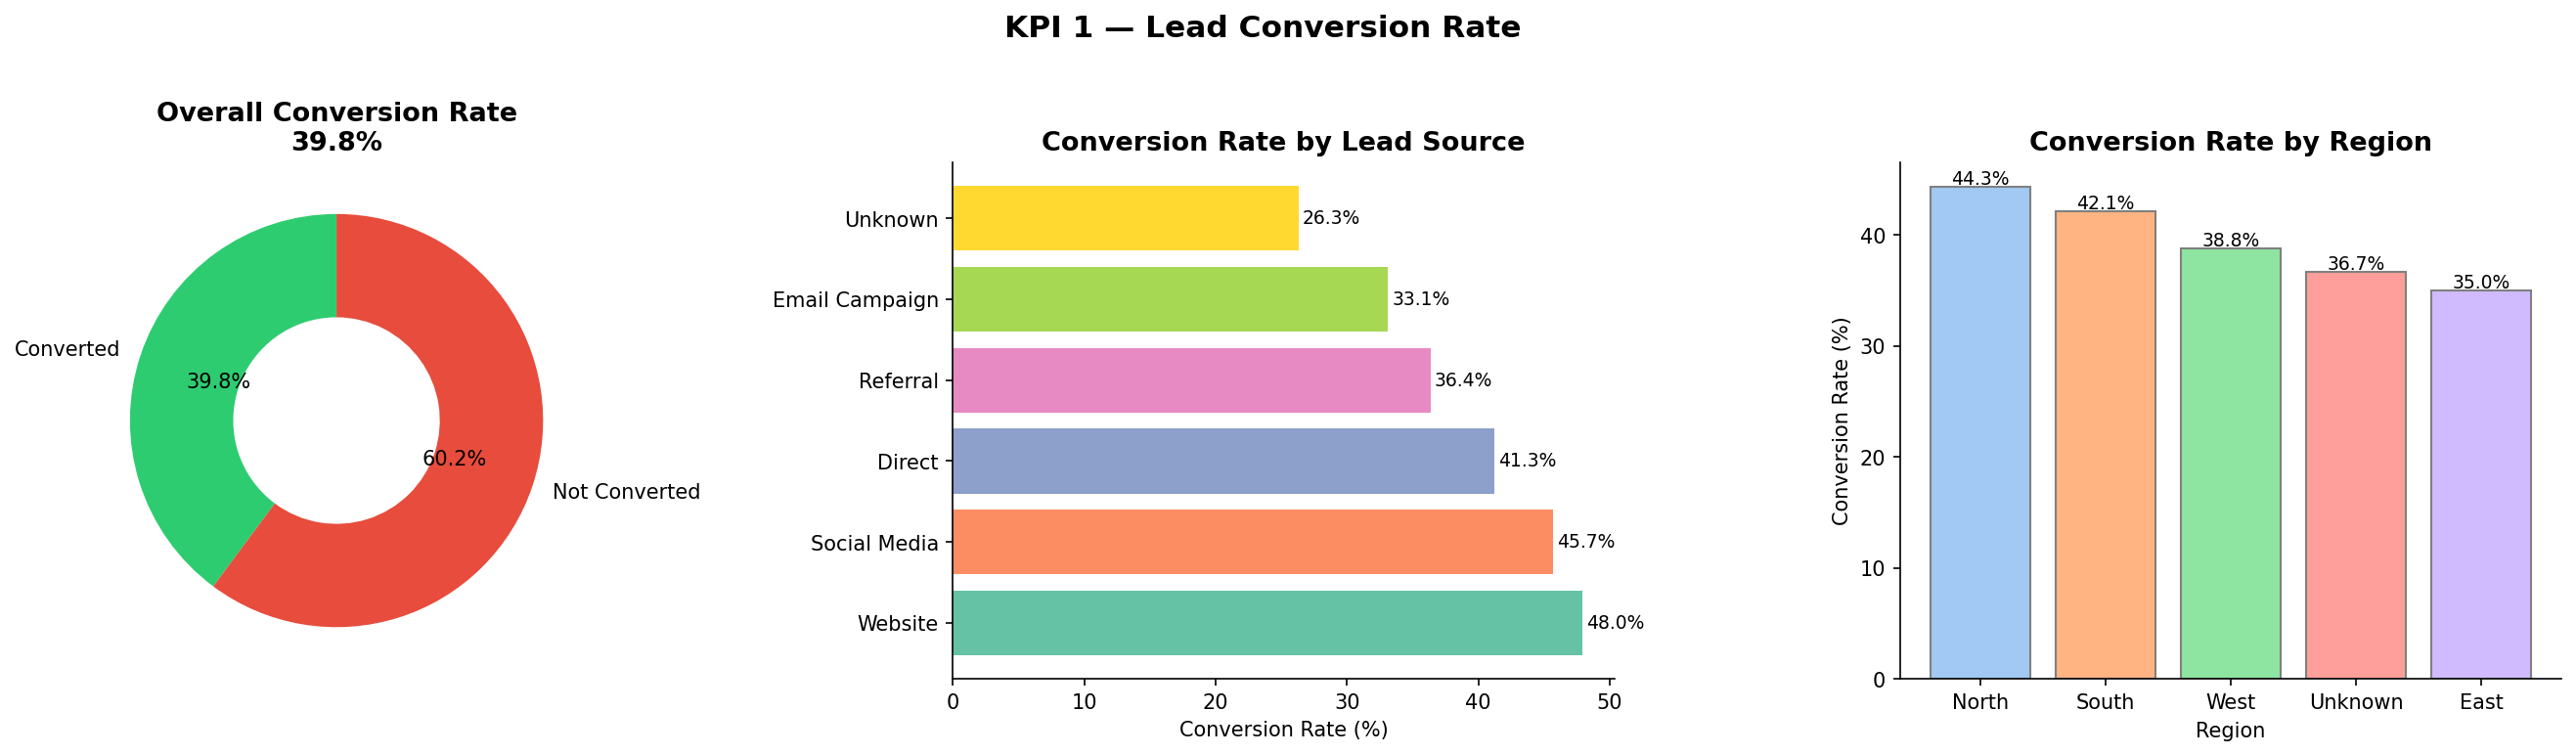

KPI 1 chart saved


In [7]:
# ── Visualization: KPI 1 ──
fig, axes = plt.subplots(1, 3, figsize=(18, 5))
fig.suptitle('KPI 1 — Lead Conversion Rate', fontsize=15, fontweight='bold', y=1.02)

# Chart 1: Overall donut chart
sizes  = [total_converted, total_leads - total_converted]
labels = ['Converted', 'Not Converted']
colors = ['#2ecc71', '#e74c3c']

axes[0].pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%',
            startangle=90, wedgeprops=dict(width=0.5))
axes[0].set_title(f'Overall Conversion Rate\n{overall_conv_rate:.1f}%')

# Chart 2: Conversion rate by source
bars = axes[1].barh(source_conv['Lead_Source'], source_conv['Conversion_Rate_%'],
                    color=sns.color_palette("Set2", len(source_conv)))
axes[1].set_xlabel('Conversion Rate (%)')
axes[1].set_title('Conversion Rate by Lead Source')
for bar, val in zip(bars, source_conv['Conversion_Rate_%']):
    axes[1].text(bar.get_width() + 0.3, bar.get_y() + bar.get_height()/2,
                 f'{val:.1f}%', va='center', fontsize=9)

# Chart 3: Conversion rate by region
bars2 = axes[2].bar(region_conv['Region'], region_conv['Conversion_Rate_%'],
                    color=sns.color_palette("pastel", len(region_conv)), edgecolor='gray')
axes[2].set_xlabel('Region')
axes[2].set_ylabel('Conversion Rate (%)')
axes[2].set_title('Conversion Rate by Region')
for bar, val in zip(bars2, region_conv['Conversion_Rate_%']):
    axes[2].text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.2,
                 f'{val:.1f}%', ha='center', fontsize=9)

plt.tight_layout()
plt.savefig('../reports/KPI1_Lead_Conversion_Rate.png', bbox_inches='tight')
plt.show()
print("KPI 1 chart saved")

In [8]:
# ─────────────────────────────────────────
# KPI 2 — Customer Acquisition Cost
# ─────────────────────────────────────────

# ── Overall CAC ──
overall_cac = total_mkt_cost / total_converted

print("=" * 50)
print("  KPI 2: CUSTOMER ACQUISITION COST (CAC)")
print("=" * 50)
print(f"  Formula : Total Marketing Cost / Converted Leads")
print(f"  Result  : ${total_mkt_cost:,.2f} / {total_converted} = ${overall_cac:,.2f}")

# ── CAC by Lead Source ──
source_cac = df.groupby('Lead_Source').agg(
    Total_Marketing_Cost = ('Marketing_Cost', 'sum'),
    Converted_Leads      = ('Is_Converted', 'sum')
).reset_index()

source_cac['CAC'] = (
    source_cac['Total_Marketing_Cost'] / source_cac['Converted_Leads']
).round(2)

source_cac = source_cac.sort_values('CAC')

print(f"\n  CAC by Lead Source (lower is better):")
print(source_cac.to_string(index=False))

# ── CAC by Region ──
region_cac = df.groupby('Region').agg(
    Total_Marketing_Cost = ('Marketing_Cost', 'sum'),
    Converted_Leads      = ('Is_Converted', 'sum')
).reset_index()

region_cac['CAC'] = (
    region_cac['Total_Marketing_Cost'] / region_cac['Converted_Leads']
).round(2)

region_cac = region_cac.sort_values('CAC')

print(f"\n  CAC by Region:")
print(region_cac.to_string(index=False))

  KPI 2: CUSTOMER ACQUISITION COST (CAC)
  Formula : Total Marketing Cost / Converted Leads
  Result  : $1,769,679.24 / 272 = $6,506.17

  CAC by Lead Source (lower is better):
   Lead_Source  Total_Marketing_Cost  Converted_Leads     CAC
       Website             255607.19               47 5438.45
  Social Media             393128.76               69 5697.52
        Direct             354309.26               59 6005.24
      Referral             262832.66               36 7300.91
Email Campaign             406639.33               51 7973.32
       Unknown              97162.04               10 9716.20

  CAC by Region:
 Region  Total_Marketing_Cost  Converted_Leads     CAC
  North             457308.58               82 5576.93
  South             375166.49               59 6358.75
   West             298365.71               45 6630.35
Unknown             207365.76               29 7150.54
   East             431472.70               57 7569.70


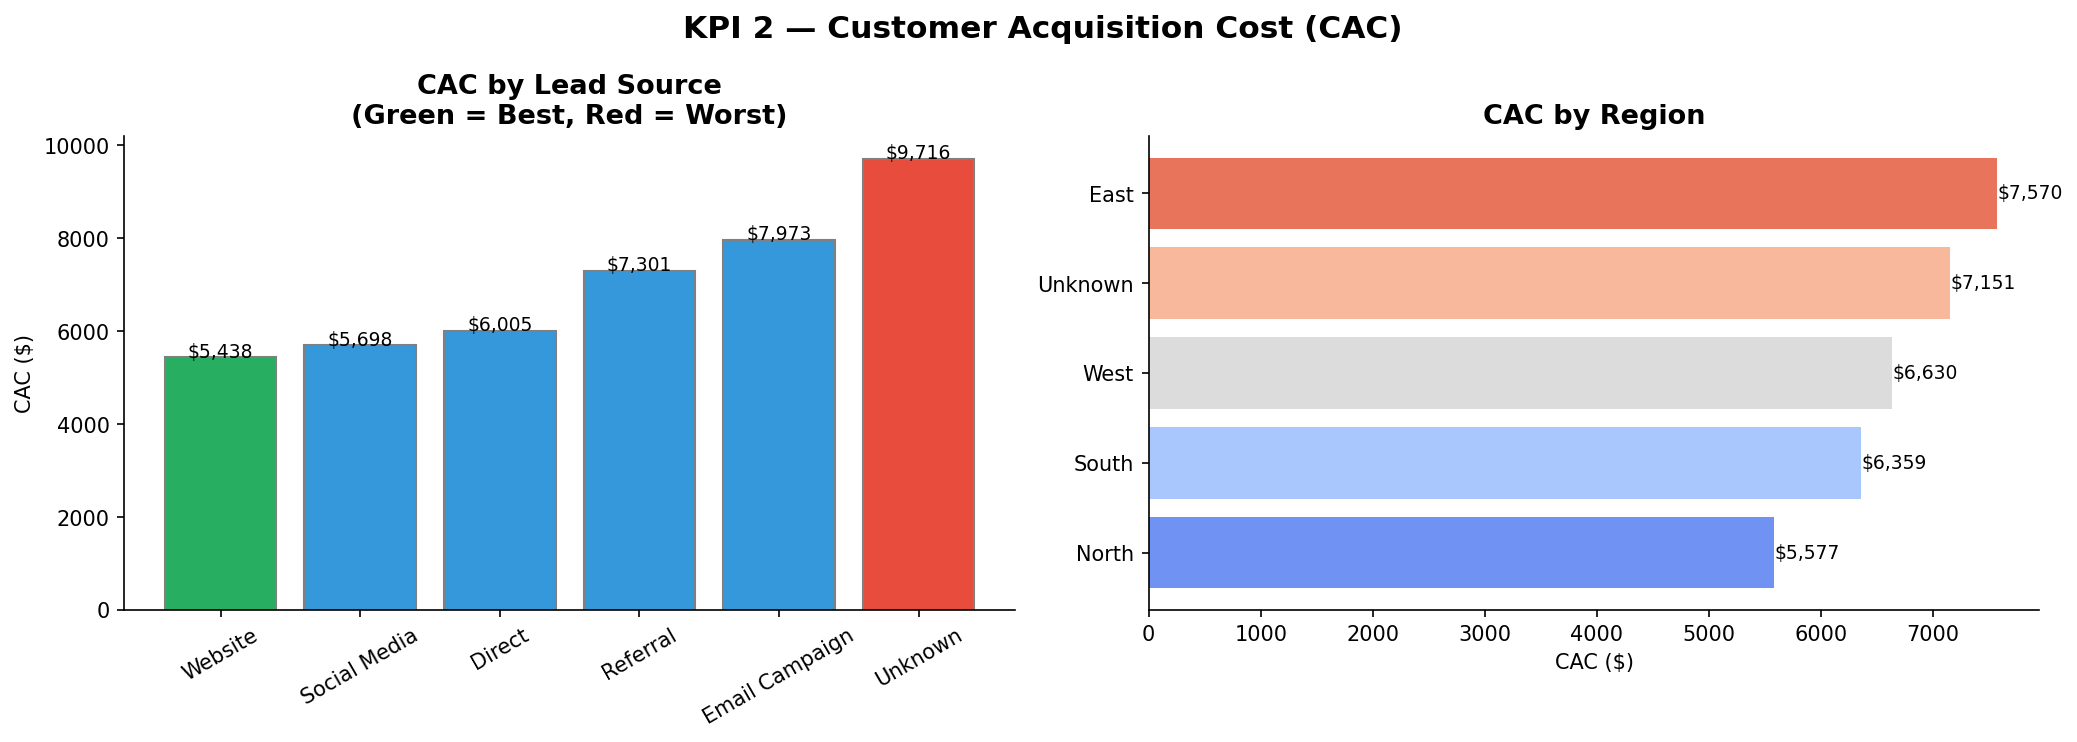

KPI 2 chart saved


In [9]:
# ── Visualization: KPI 2 ──
fig, axes = plt.subplots(1, 2, figsize=(14, 5))
fig.suptitle('KPI 2 — Customer Acquisition Cost (CAC)', fontsize=15, fontweight='bold')

# Chart 1: CAC by source
colors_cac = ['#27ae60' if v == source_cac['CAC'].min()
               else '#e74c3c' if v == source_cac['CAC'].max()
               else '#3498db' for v in source_cac['CAC']]

bars = axes[0].bar(source_cac['Lead_Source'], source_cac['CAC'],
                   color=colors_cac, edgecolor='gray')
axes[0].set_ylabel('CAC ($)')
axes[0].set_title('CAC by Lead Source\n(Green = Best, Red = Worst)')
axes[0].tick_params(axis='x', rotation=30)
for bar, val in zip(bars, source_cac['CAC']):
    axes[0].text(bar.get_x() + bar.get_width()/2, bar.get_height() + 5,
                 f'${val:,.0f}', ha='center', fontsize=9)

# Chart 2: CAC by region
axes[1].barh(region_cac['Region'], region_cac['CAC'],
             color=sns.color_palette("coolwarm", len(region_cac)))
axes[1].set_xlabel('CAC ($)')
axes[1].set_title('CAC by Region')
for i, val in enumerate(region_cac['CAC']):
    axes[1].text(val + 5, i, f'${val:,.0f}', va='center', fontsize=9)

plt.tight_layout()
plt.savefig('../reports/KPI2_CAC.png', bbox_inches='tight')
plt.show()
print("KPI 2 chart saved")

In [10]:
# ─────────────────────────────────────────
# KPI 3 — Revenue per Client
# ─────────────────────────────────────────

# ── Overall Revenue per Client ──
revenue_per_client = total_revenue / total_converted

print("=" * 50)
print("KPI 3: REVENUE PER CLIENT")
print("=" * 50)
print(f"  Formula : Total Revenue / Converted Leads")
print(f"  Result  : ${total_revenue:,.2f} / {total_converted} = ${revenue_per_client:,.2f}")

# ── Revenue per Client by Source ──
source_rev = df[df['Conversion_Status'] == 'Converted'].groupby('Lead_Source').agg(
    Total_Revenue   = ('Revenue_Value', 'sum'),
    Converted_Leads = ('Is_Converted', 'sum'),
    Avg_Revenue     = ('Revenue_Value', 'mean'),
    Max_Revenue     = ('Revenue_Value', 'max'),
    Min_Revenue     = ('Revenue_Value', 'min')
).reset_index()

source_rev['Revenue_per_Client'] = (
    source_rev['Total_Revenue'] / source_rev['Converted_Leads']
).round(2)

source_rev = source_rev.sort_values('Revenue_per_Client', ascending=False)

print(f"\n  Revenue per Client by Lead Source:")
print(source_rev[['Lead_Source','Converted_Leads',
                   'Total_Revenue','Revenue_per_Client']].to_string(index=False))

# ── Revenue per Client by Sales Representative ──
rep_rev = df[df['Conversion_Status'] == 'Converted'].groupby('Sales_Representative').agg(
    Total_Revenue   = ('Revenue_Value', 'sum'),
    Converted_Leads = ('Is_Converted', 'sum')
).reset_index()

rep_rev['Revenue_per_Client'] = (
    rep_rev['Total_Revenue'] / rep_rev['Converted_Leads']
).round(2)

rep_rev = rep_rev.sort_values('Revenue_per_Client', ascending=False)

print(f"\n  Revenue per Client by Sales Representative:")
print(rep_rev.to_string(index=False))

KPI 3: REVENUE PER CLIENT
  Formula : Total Revenue / Converted Leads
  Result  : $6,743,080.52 / 272 = $24,790.74

  Revenue per Client by Lead Source:
   Lead_Source  Converted_Leads  Total_Revenue  Revenue_per_Client
       Unknown               10      273378.05            27337.80
Email Campaign               51     1292173.02            25336.73
  Social Media               69     1732938.77            25115.05
      Referral               36      884462.49            24568.40
        Direct               59     1432839.45            24285.41
       Website               47     1127288.74            23984.87

  Revenue per Client by Sales Representative:
Sales_Representative  Total_Revenue  Converted_Leads  Revenue_per_Client
        Frank Miller     1011365.46               35            28896.16
       Alice Johnson      943435.64               36            26206.55
           Bob Smith      942880.70               37            25483.26
           Eve Davis      935218.39    

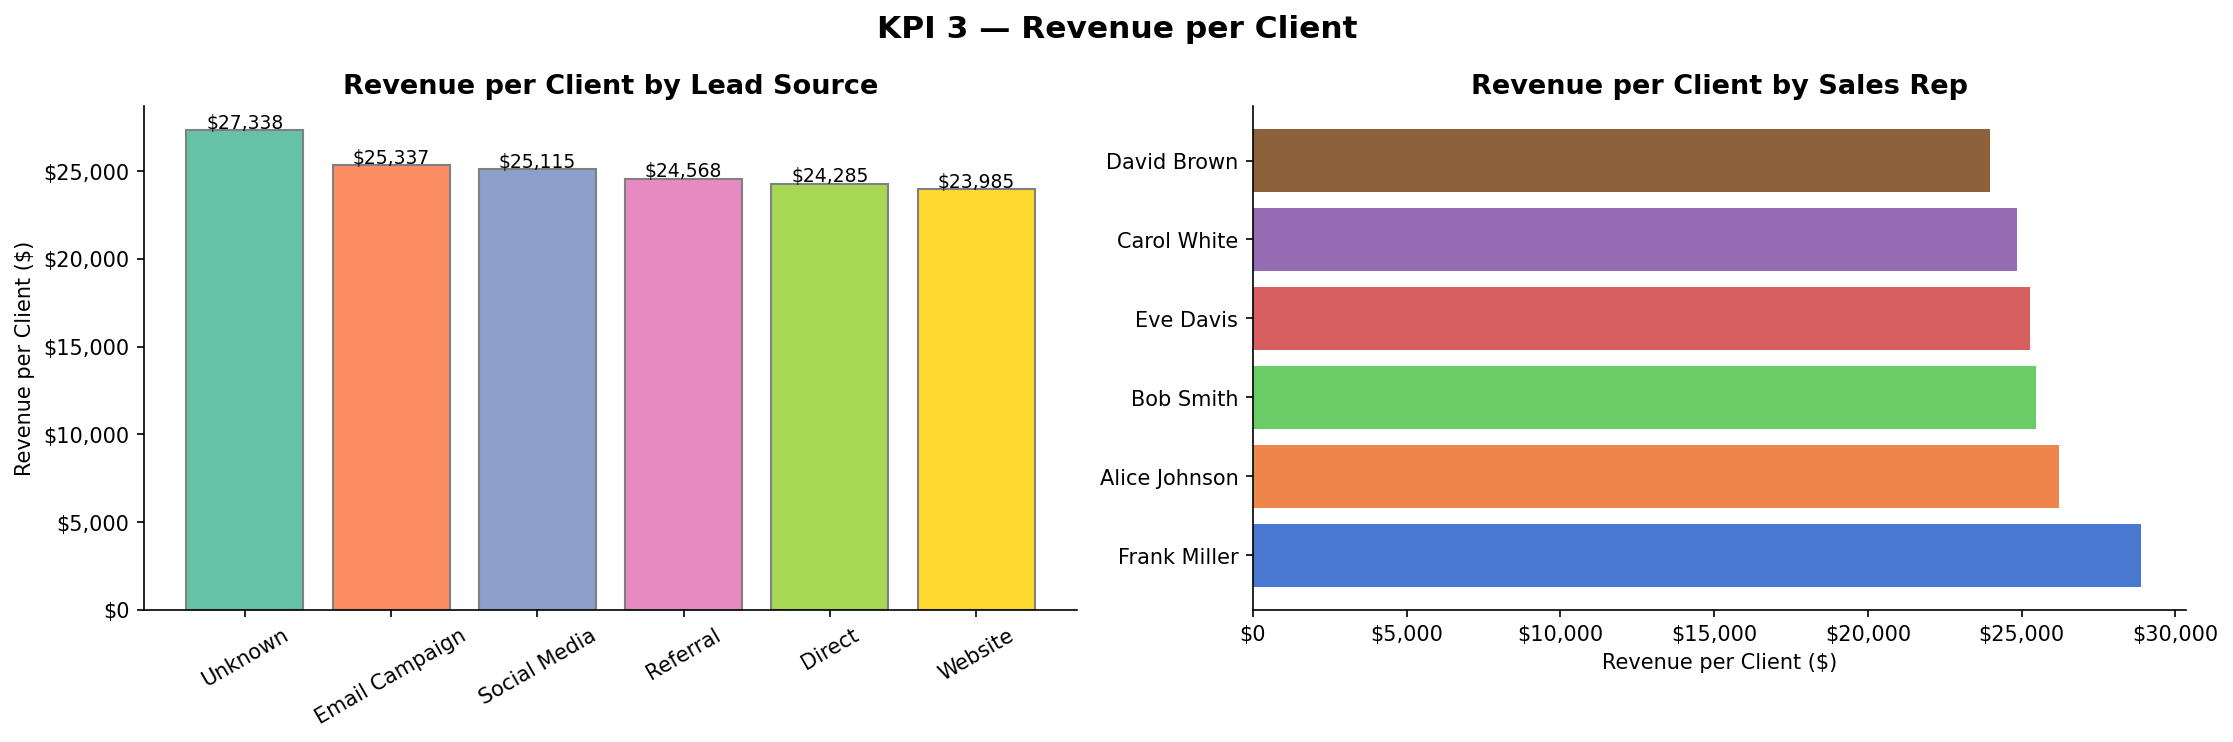

KPI 3 chart saved


In [11]:
# ── Visualization: KPI 3 ──
fig, axes = plt.subplots(1, 2, figsize=(15, 5))
fig.suptitle('KPI 3 — Revenue per Client', fontsize=15, fontweight='bold')

# Chart 1: Revenue per client by source
bars = axes[0].bar(source_rev['Lead_Source'], source_rev['Revenue_per_Client'],
                   color=sns.color_palette("Set2", len(source_rev)), edgecolor='gray')
axes[0].set_ylabel('Revenue per Client ($)')
axes[0].set_title('Revenue per Client by Lead Source')
axes[0].tick_params(axis='x', rotation=30)
axes[0].yaxis.set_major_formatter(mticker.FuncFormatter(lambda x, _: f'${x:,.0f}'))
for bar, val in zip(bars, source_rev['Revenue_per_Client']):
    axes[0].text(bar.get_x() + bar.get_width()/2, bar.get_height() + 100,
                 f'${val:,.0f}', ha='center', fontsize=9)

# Chart 2: Revenue per client by sales rep (exclude Unassigned)
rep_plot = rep_rev[rep_rev['Sales_Representative'] != 'Unassigned']
axes[1].barh(rep_plot['Sales_Representative'], rep_plot['Revenue_per_Client'],
             color=sns.color_palette("muted", len(rep_plot)))
axes[1].set_xlabel('Revenue per Client ($)')
axes[1].set_title('Revenue per Client by Sales Rep')
axes[1].xaxis.set_major_formatter(mticker.FuncFormatter(lambda x, _: f'${x:,.0f}'))

plt.tight_layout()
plt.savefig('../reports/KPI3_Revenue_Per_Client.png', bbox_inches='tight')
plt.show()
print("KPI 3 chart saved")

In [13]:
# ─────────────────────────────────────────
# KPI 4 — Monthly Growth Rate (Fixed)
# ─────────────────────────────────────────

monthly_raw = df.groupby('Lead_Month').agg(
    Total_Leads = ('Lead_ID', 'count'),
    Converted   = ('Is_Converted', 'sum'),
    Revenue     = ('Revenue_Value', 'sum')
).reset_index()

# ── Remove incomplete months (fewer than 15 leads) ──
monthly = monthly_raw[monthly_raw['Total_Leads'] >= 15].copy()
monthly.reset_index(drop=True, inplace=True)

removed = monthly_raw[monthly_raw['Total_Leads'] < 15]
print(f"Removed {len(removed)} incomplete month(s) from trend analysis:")
print(removed[['Lead_Month', 'Total_Leads', 'Revenue']].to_string(index=False))

monthly['Lead_Month_str'] = monthly['Lead_Month'].astype(str)

# ── Growth rate calculations ──
monthly['Lead_Growth_%']    = monthly['Total_Leads'].pct_change() * 100
monthly['Revenue_Growth_%'] = monthly['Revenue'].pct_change() * 100
monthly['Conv_Growth_%']    = monthly['Converted'].pct_change() * 100

# ── Replace inf / -inf with NaN before rounding ──
monthly.replace([np.inf, -np.inf], np.nan, inplace=True)

monthly = monthly.round(2)

print("\n" + "=" * 55)
print("KPI 4: MONTHLY GROWTH RATE")
print("=" * 55)
print(f"  Formula: ((Current - Previous) / Previous) × 100\n")
print(monthly[['Lead_Month_str', 'Total_Leads', 'Lead_Growth_%',
               'Revenue', 'Revenue_Growth_%']].to_string(index=False))

# ── Use skipna=True (default) so NaN rows don't affect mean ──
avg_lead_growth = monthly['Lead_Growth_%'].mean(skipna=True)
avg_rev_growth  = monthly['Revenue_Growth_%'].mean(skipna=True)

print(f"\n  Average Monthly Lead Growth Rate   : {avg_lead_growth:.2f}%")
print(f"  Average Monthly Revenue Growth Rate: {avg_rev_growth:.2f}%")

Removed 3 incomplete month(s) from trend analysis:
Lead_Month  Total_Leads  Revenue
   2024-09            1 23915.81
   2024-11            2     0.00
   2024-12            4 21423.51

KPI 4: MONTHLY GROWTH RATE
  Formula: ((Current - Previous) / Previous) × 100

Lead_Month_str  Total_Leads  Lead_Growth_%   Revenue  Revenue_Growth_%
       2023-01           26            NaN 280539.46               NaN
       2023-02           44          69.23 331047.82             18.00
       2023-03           40          -9.09 385229.11             16.37
       2023-04           36         -10.00 427704.75             11.03
       2023-05           43          19.44 580354.73             35.69
       2023-06           39          -9.30 467363.71            -19.47
       2023-07           36          -7.69 212870.60            -54.45
       2023-08           51          41.67 442449.26            107.85
       2023-09           32         -37.25 293248.04            -33.72
       2023-10           48

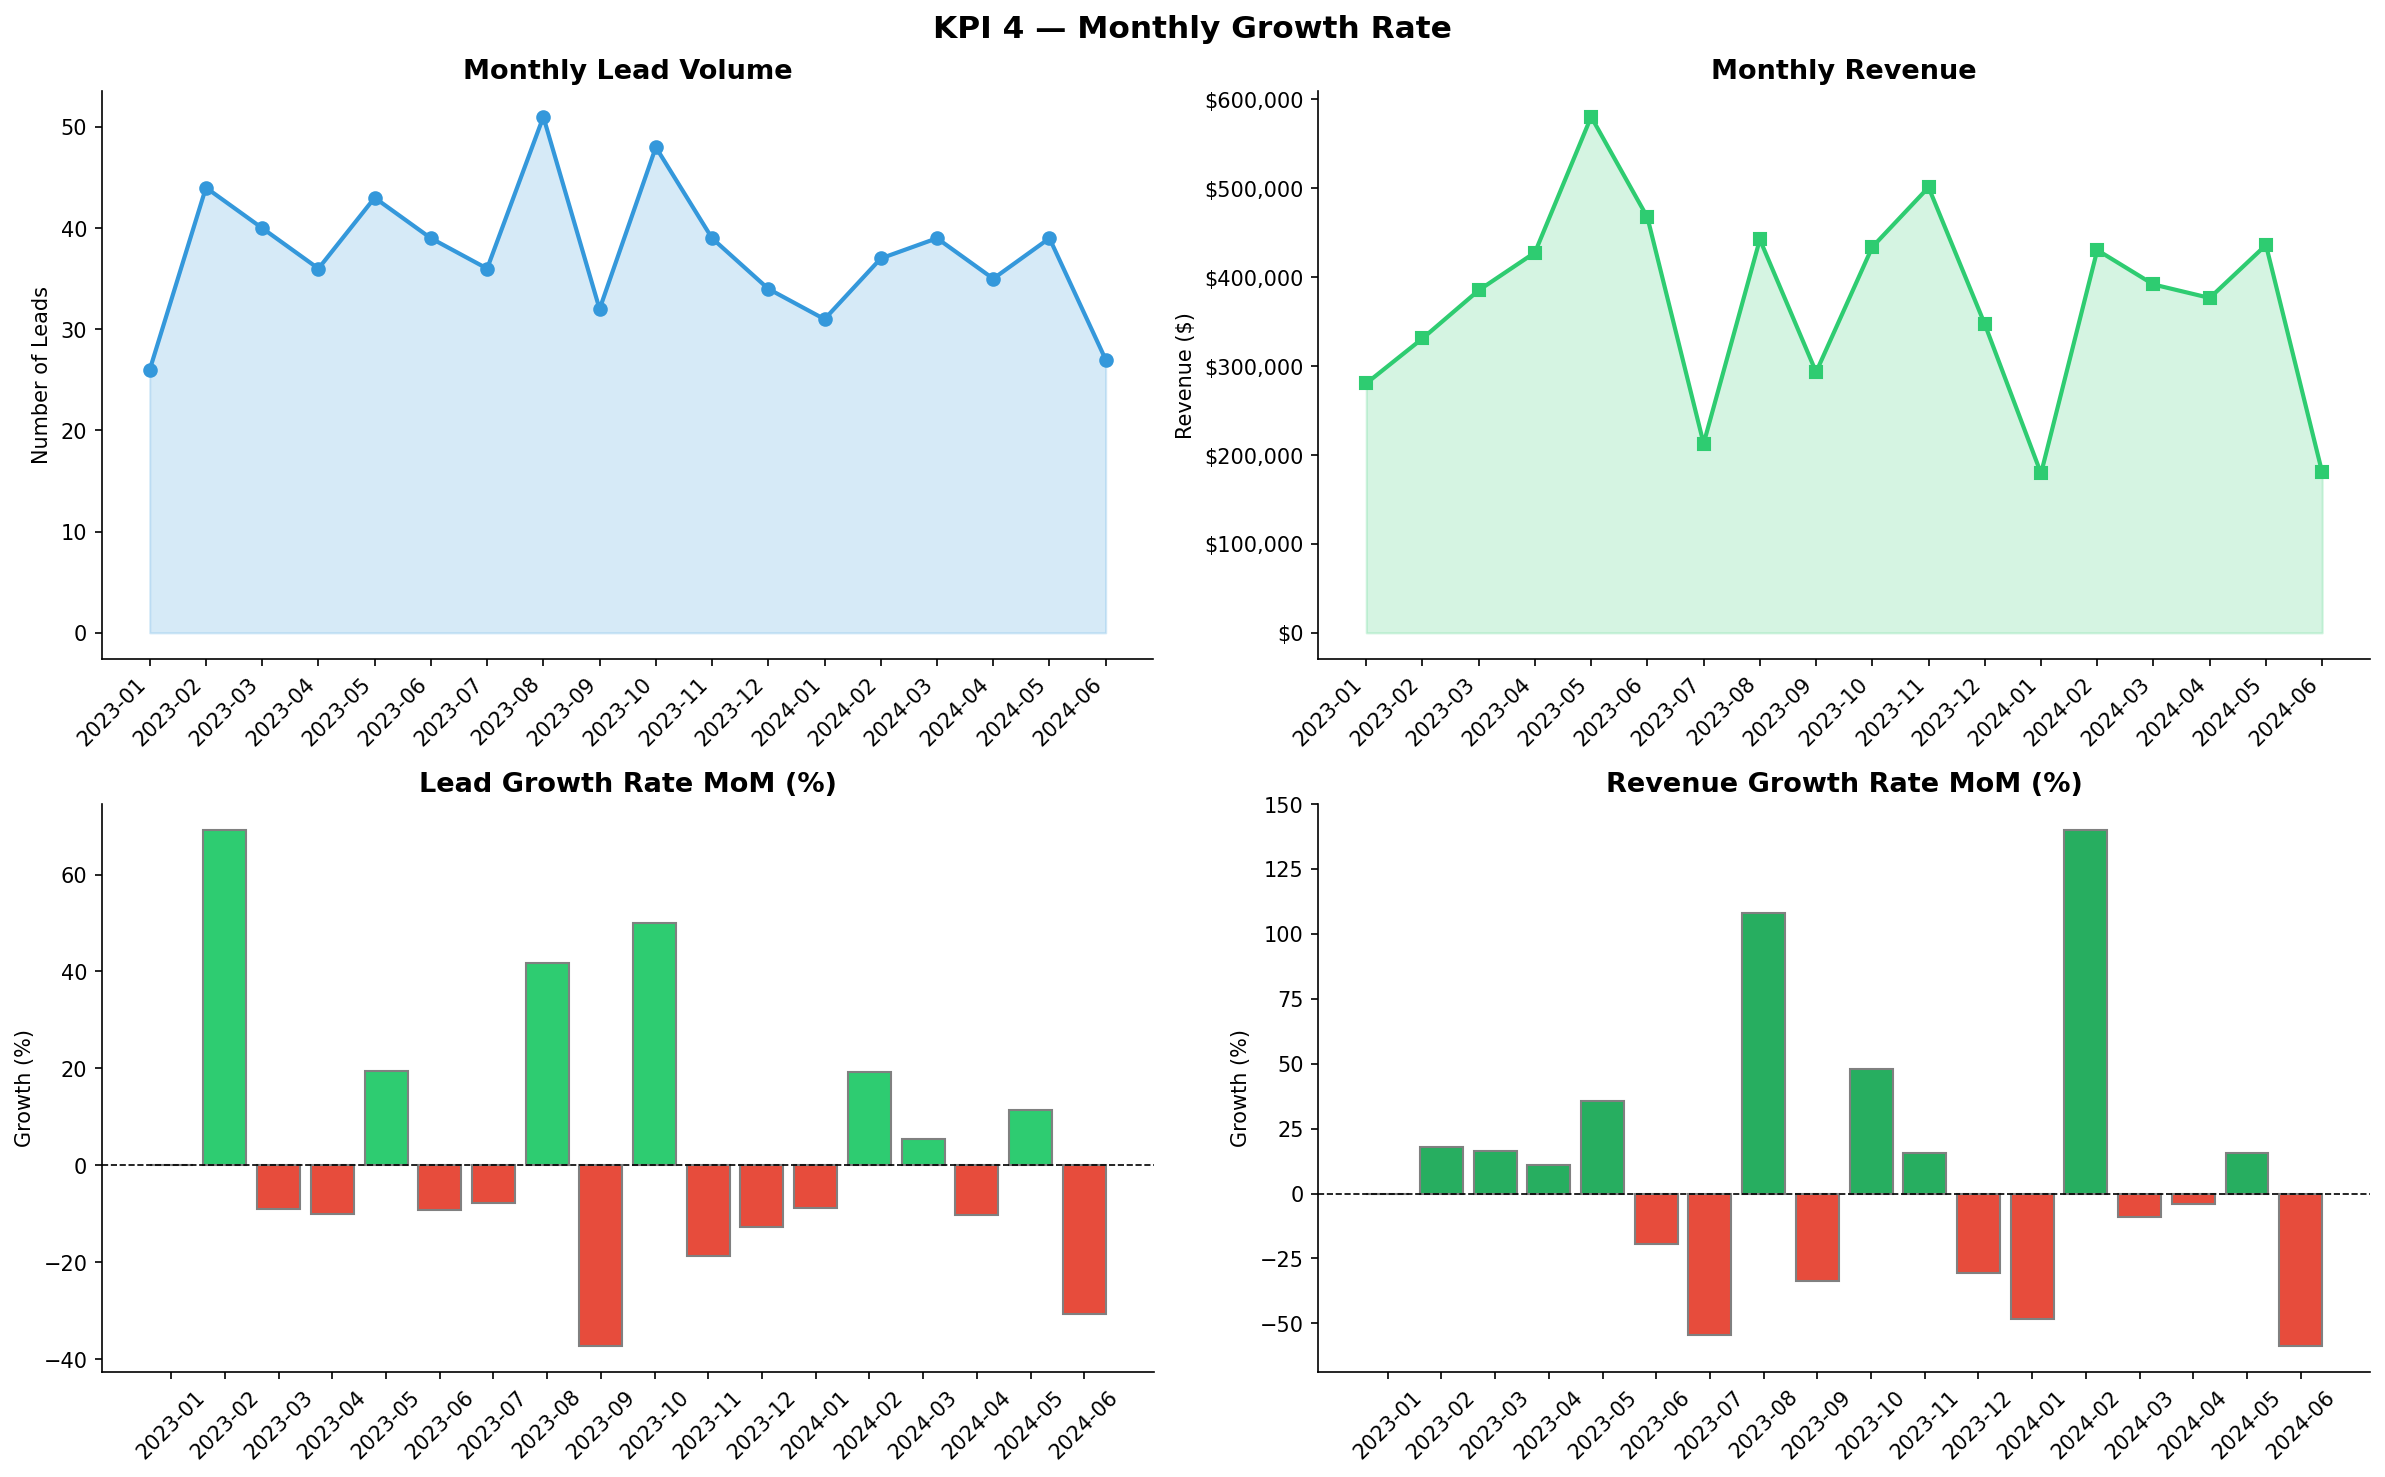

KPI 4 chart saved


In [14]:
# ── Visualization: KPI 4 ──
fig, axes = plt.subplots(2, 2, figsize=(16, 10))
fig.suptitle('KPI 4 — Monthly Growth Rate', fontsize=15, fontweight='bold')

x = monthly['Lead_Month_str']

# Chart 1: Monthly lead volume
axes[0, 0].plot(x, monthly['Total_Leads'], marker='o', color='#3498db', linewidth=2)
axes[0, 0].fill_between(range(len(x)), monthly['Total_Leads'], alpha=0.2, color='#3498db')
axes[0, 0].set_title('Monthly Lead Volume')
axes[0, 0].set_ylabel('Number of Leads')
axes[0, 0].tick_params(axis='x', rotation=45)
axes[0, 0].set_xticks(range(len(x)))
axes[0, 0].set_xticklabels(x, rotation=45, ha='right')

# Chart 2: Monthly revenue
axes[0, 1].plot(x, monthly['Revenue'], marker='s', color='#2ecc71', linewidth=2)
axes[0, 1].fill_between(range(len(x)), monthly['Revenue'], alpha=0.2, color='#2ecc71')
axes[0, 1].set_title('Monthly Revenue')
axes[0, 1].set_ylabel('Revenue ($)')
axes[0, 1].yaxis.set_major_formatter(mticker.FuncFormatter(lambda v, _: f'${v:,.0f}'))
axes[0, 1].set_xticks(range(len(x)))
axes[0, 1].set_xticklabels(x, rotation=45, ha='right')

# Chart 3: Lead growth rate
colors_gr = ['#e74c3c' if v < 0 else '#2ecc71'
             for v in monthly['Lead_Growth_%'].fillna(0)]
axes[1, 0].bar(x, monthly['Lead_Growth_%'].fillna(0), color=colors_gr, edgecolor='gray')
axes[1, 0].axhline(y=0, color='black', linewidth=0.8, linestyle='--')
axes[1, 0].set_title('Lead Growth Rate MoM (%)')
axes[1, 0].set_ylabel('Growth (%)')
axes[1, 0].tick_params(axis='x', rotation=45)

# Chart 4: Revenue growth rate
colors_rg = ['#e74c3c' if v < 0 else '#27ae60'
             for v in monthly['Revenue_Growth_%'].fillna(0)]
axes[1, 1].bar(x, monthly['Revenue_Growth_%'].fillna(0), color=colors_rg, edgecolor='gray')
axes[1, 1].axhline(y=0, color='black', linewidth=0.8, linestyle='--')
axes[1, 1].set_title('Revenue Growth Rate MoM (%)')
axes[1, 1].set_ylabel('Growth (%)')
axes[1, 1].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.savefig('../reports/KPI4_Monthly_Growth_Rate.png', bbox_inches='tight')
plt.show()
print("KPI 4 chart saved")

In [15]:
# ─────────────────────────────────────────
# KPI 5 — Sales Cycle Duration
# ─────────────────────────────────────────

cycle_data = df[
    (df['Conversion_Status'] == 'Converted') &
    (df['Sales_Cycle_Days'].notna()) &
    (df['Sales_Cycle_Days'] > 0)
].copy()

overall_avg_cycle = cycle_data['Sales_Cycle_Days'].mean()
overall_med_cycle = cycle_data['Sales_Cycle_Days'].median()

print("=" * 50)
print("  KPI 5: SALES CYCLE DURATION")
print("=" * 50)
print(f"  Average Sales Cycle : {overall_avg_cycle:.1f} days")
print(f"  Median  Sales Cycle : {overall_med_cycle:.1f} days")
print(f"  Min     Sales Cycle : {cycle_data['Sales_Cycle_Days'].min():.0f} days")
print(f"  Max     Sales Cycle : {cycle_data['Sales_Cycle_Days'].max():.0f} days")

# ── Cycle by Lead Source ──
cycle_by_source = cycle_data.groupby('Lead_Source')['Sales_Cycle_Days'].agg(
    Avg_Cycle_Days  = 'mean',
    Med_Cycle_Days  = 'median',
    Min_Cycle_Days  = 'min',
    Max_Cycle_Days  = 'max',
    Count           = 'count'
).reset_index().round(1)

cycle_by_source = cycle_by_source.sort_values('Avg_Cycle_Days')

print(f"\n  Sales Cycle Duration by Lead Source (faster = better):")
print(cycle_by_source.to_string(index=False))

# ── Cycle by Sales Rep ──
cycle_by_rep = cycle_data.groupby('Sales_Representative')['Sales_Cycle_Days'].agg(
    Avg_Cycle_Days = 'mean',
    Count          = 'count'
).reset_index().round(1)

cycle_by_rep = cycle_by_rep[cycle_by_rep['Sales_Representative'] != 'Unassigned']
cycle_by_rep = cycle_by_rep.sort_values('Avg_Cycle_Days')

print(f"\n  Sales Cycle Duration by Sales Rep:")
print(cycle_by_rep.to_string(index=False))

  KPI 5: SALES CYCLE DURATION
  Average Sales Cycle : 67.7 days
  Median  Sales Cycle : 62.0 days
  Min     Sales Cycle : 1 days
  Max     Sales Cycle : 307 days

  Sales Cycle Duration by Lead Source (faster = better):
   Lead_Source  Avg_Cycle_Days  Med_Cycle_Days  Min_Cycle_Days  Max_Cycle_Days  Count
Email Campaign           57.80           57.00            3.00          195.00     49
  Social Media           65.30           59.00            1.00          185.00     66
      Referral           67.20           70.50            4.00          120.00     32
        Direct           70.80           67.00            2.00          231.00     54
       Unknown           72.00           67.00           10.00          119.00      9
       Website           78.10           69.00            2.00          307.00     45

  Sales Cycle Duration by Sales Rep:
Sales_Representative  Avg_Cycle_Days  Count
         Carol White           58.20     32
           Eve Davis           62.10     35
        

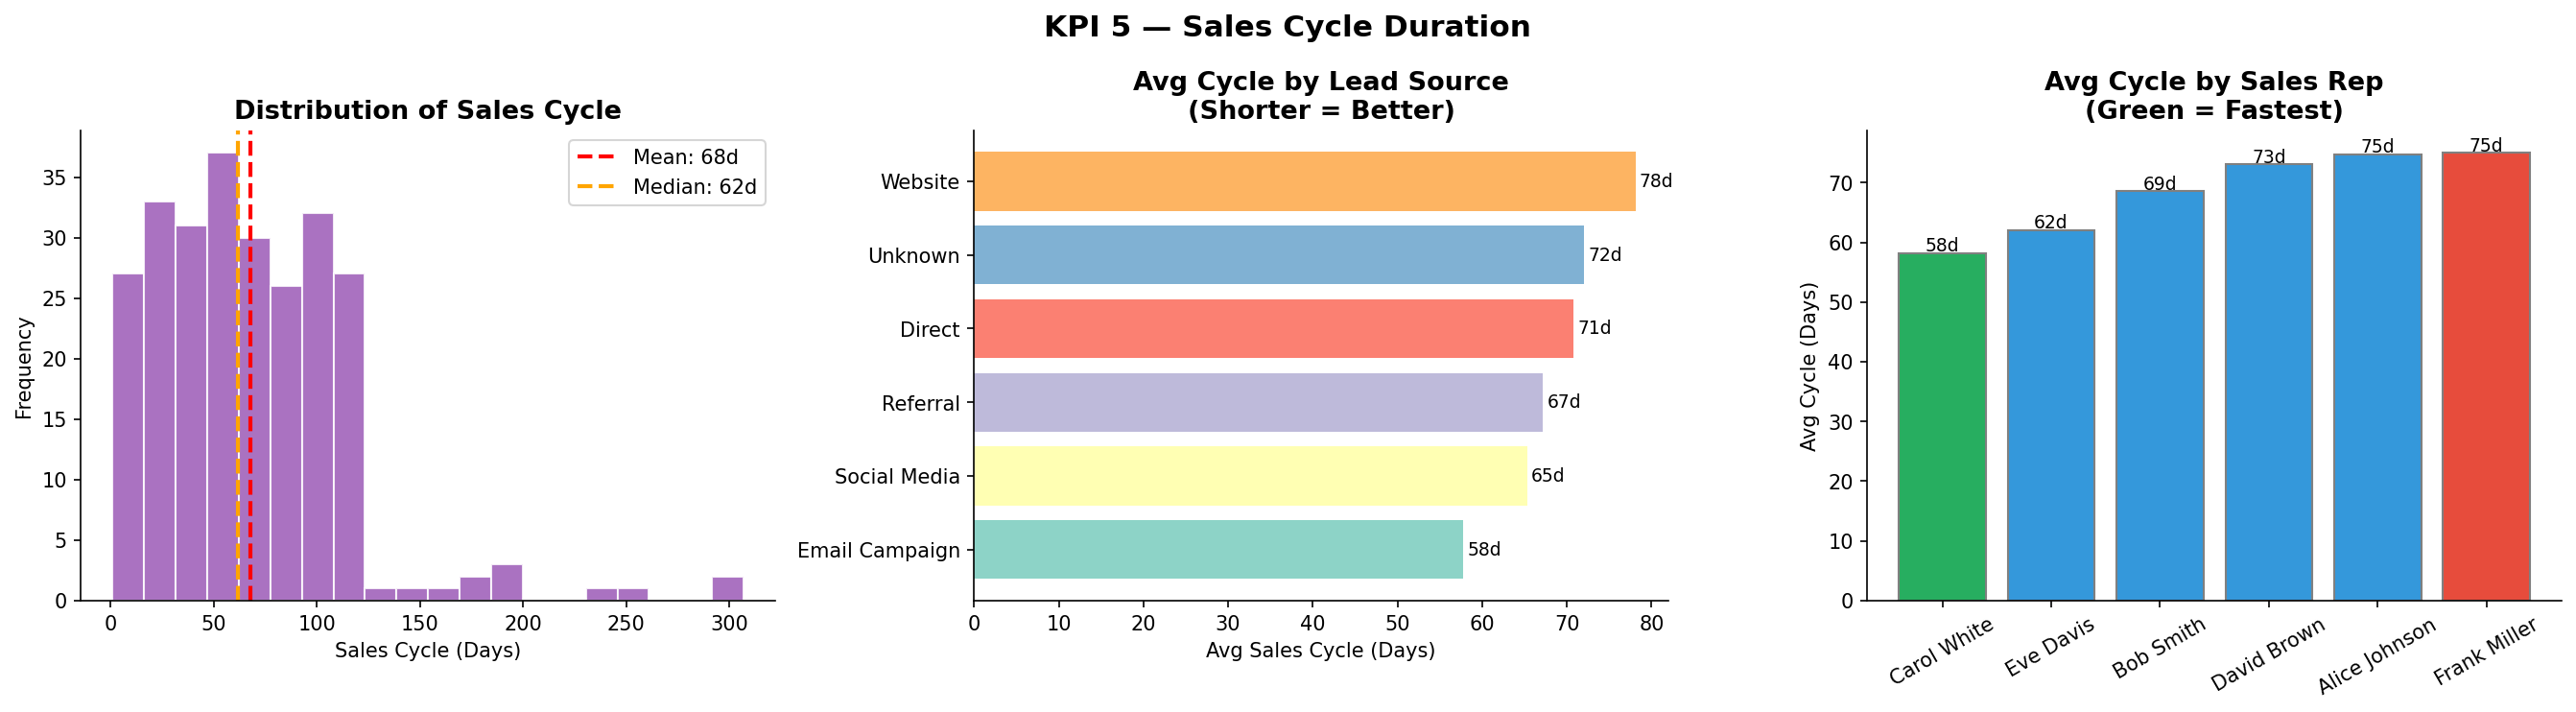

KPI 5 chart saved


In [16]:
# ── Visualization: KPI 5 ──
fig, axes = plt.subplots(1, 3, figsize=(18, 5))
fig.suptitle('KPI 5 — Sales Cycle Duration', fontsize=15, fontweight='bold')

# Chart 1: Distribution histogram
axes[0].hist(cycle_data['Sales_Cycle_Days'], bins=20,
             color='#9b59b6', edgecolor='white', alpha=0.85)
axes[0].axvline(overall_avg_cycle, color='red', linestyle='--',
                linewidth=2, label=f'Mean: {overall_avg_cycle:.0f}d')
axes[0].axvline(overall_med_cycle, color='orange', linestyle='--',
                linewidth=2, label=f'Median: {overall_med_cycle:.0f}d')
axes[0].set_xlabel('Sales Cycle (Days)')
axes[0].set_ylabel('Frequency')
axes[0].set_title('Distribution of Sales Cycle')
axes[0].legend()

# Chart 2: Avg cycle by source
bars = axes[1].barh(cycle_by_source['Lead_Source'],
                    cycle_by_source['Avg_Cycle_Days'],
                    color=sns.color_palette("Set3", len(cycle_by_source)))
axes[1].set_xlabel('Avg Sales Cycle (Days)')
axes[1].set_title('Avg Cycle by Lead Source\n(Shorter = Better)')
for bar, val in zip(bars, cycle_by_source['Avg_Cycle_Days']):
    axes[1].text(bar.get_width() + 0.5, bar.get_y() + bar.get_height()/2,
                 f'{val:.0f}d', va='center', fontsize=9)

# Chart 3: Avg cycle by sales rep
rep_plot2 = cycle_by_rep.head(8)
colors_rep = ['#27ae60' if v == rep_plot2['Avg_Cycle_Days'].min()
              else '#e74c3c' if v == rep_plot2['Avg_Cycle_Days'].max()
              else '#3498db' for v in rep_plot2['Avg_Cycle_Days']]
bars2 = axes[2].bar(rep_plot2['Sales_Representative'],
                    rep_plot2['Avg_Cycle_Days'],
                    color=colors_rep, edgecolor='gray')
axes[2].set_ylabel('Avg Cycle (Days)')
axes[2].set_title('Avg Cycle by Sales Rep\n(Green = Fastest)')
axes[2].tick_params(axis='x', rotation=30)
for bar, val in zip(bars2, rep_plot2['Avg_Cycle_Days']):
    axes[2].text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.3,
                 f'{val:.0f}d', ha='center', fontsize=9)

plt.tight_layout()
plt.savefig('../reports/KPI5_Sales_Cycle_Duration.png', bbox_inches='tight')
plt.show()
print("KPI 5 chart saved")

In [17]:
# ─────────────────────────────────────────
# KPI 6 — Lead Source Performance
# ─────────────────────────────────────────

# Full performance summary per lead source
lead_source_perf = df.groupby('Lead_Source').agg(
    Total_Leads      = ('Lead_ID', 'count'),
    Converted        = ('Is_Converted', 'sum'),
    Total_Revenue    = ('Revenue_Value', 'sum'),
    Total_Mkt_Cost   = ('Marketing_Cost', 'sum')
).reset_index()

lead_source_perf['Conversion_Rate_%'] = (
    lead_source_perf['Converted'] / lead_source_perf['Total_Leads'] * 100
).round(2)

lead_source_perf['Revenue_per_Client'] = (
    lead_source_perf['Total_Revenue'] / lead_source_perf['Converted']
).round(2)

lead_source_perf['CAC'] = (
    lead_source_perf['Total_Mkt_Cost'] / lead_source_perf['Converted']
).round(2)

lead_source_perf['ROI_%'] = (
    (lead_source_perf['Total_Revenue'] - lead_source_perf['Total_Mkt_Cost'])
    / lead_source_perf['Total_Mkt_Cost'] * 100
).round(2)

lead_source_perf = lead_source_perf.sort_values('Conversion_Rate_%', ascending=False)

print("=" * 65)
print("  KPI 6: LEAD SOURCE PERFORMANCE (Full Summary)")
print("=" * 65)
print(lead_source_perf.to_string(index=False))

  KPI 6: LEAD SOURCE PERFORMANCE (Full Summary)
   Lead_Source  Total_Leads  Converted  Total_Revenue  Total_Mkt_Cost  Conversion_Rate_%  Revenue_per_Client     CAC  ROI_%
       Website           98         47     1127288.74       255607.19              47.96            23984.87 5438.45 341.02
  Social Media          151         69     1732938.77       393128.76              45.70            25115.05 5697.52 340.81
        Direct          143         59     1432839.45       354309.26              41.26            24285.41 6005.24 304.40
      Referral           99         36      884462.49       262832.66              36.36            24568.40 7300.91 236.51
Email Campaign          154         51     1292173.02       406639.33              33.12            25336.73 7973.32 217.77
       Unknown           38         10      273378.05        97162.04              26.32            27337.80 9716.20 181.36


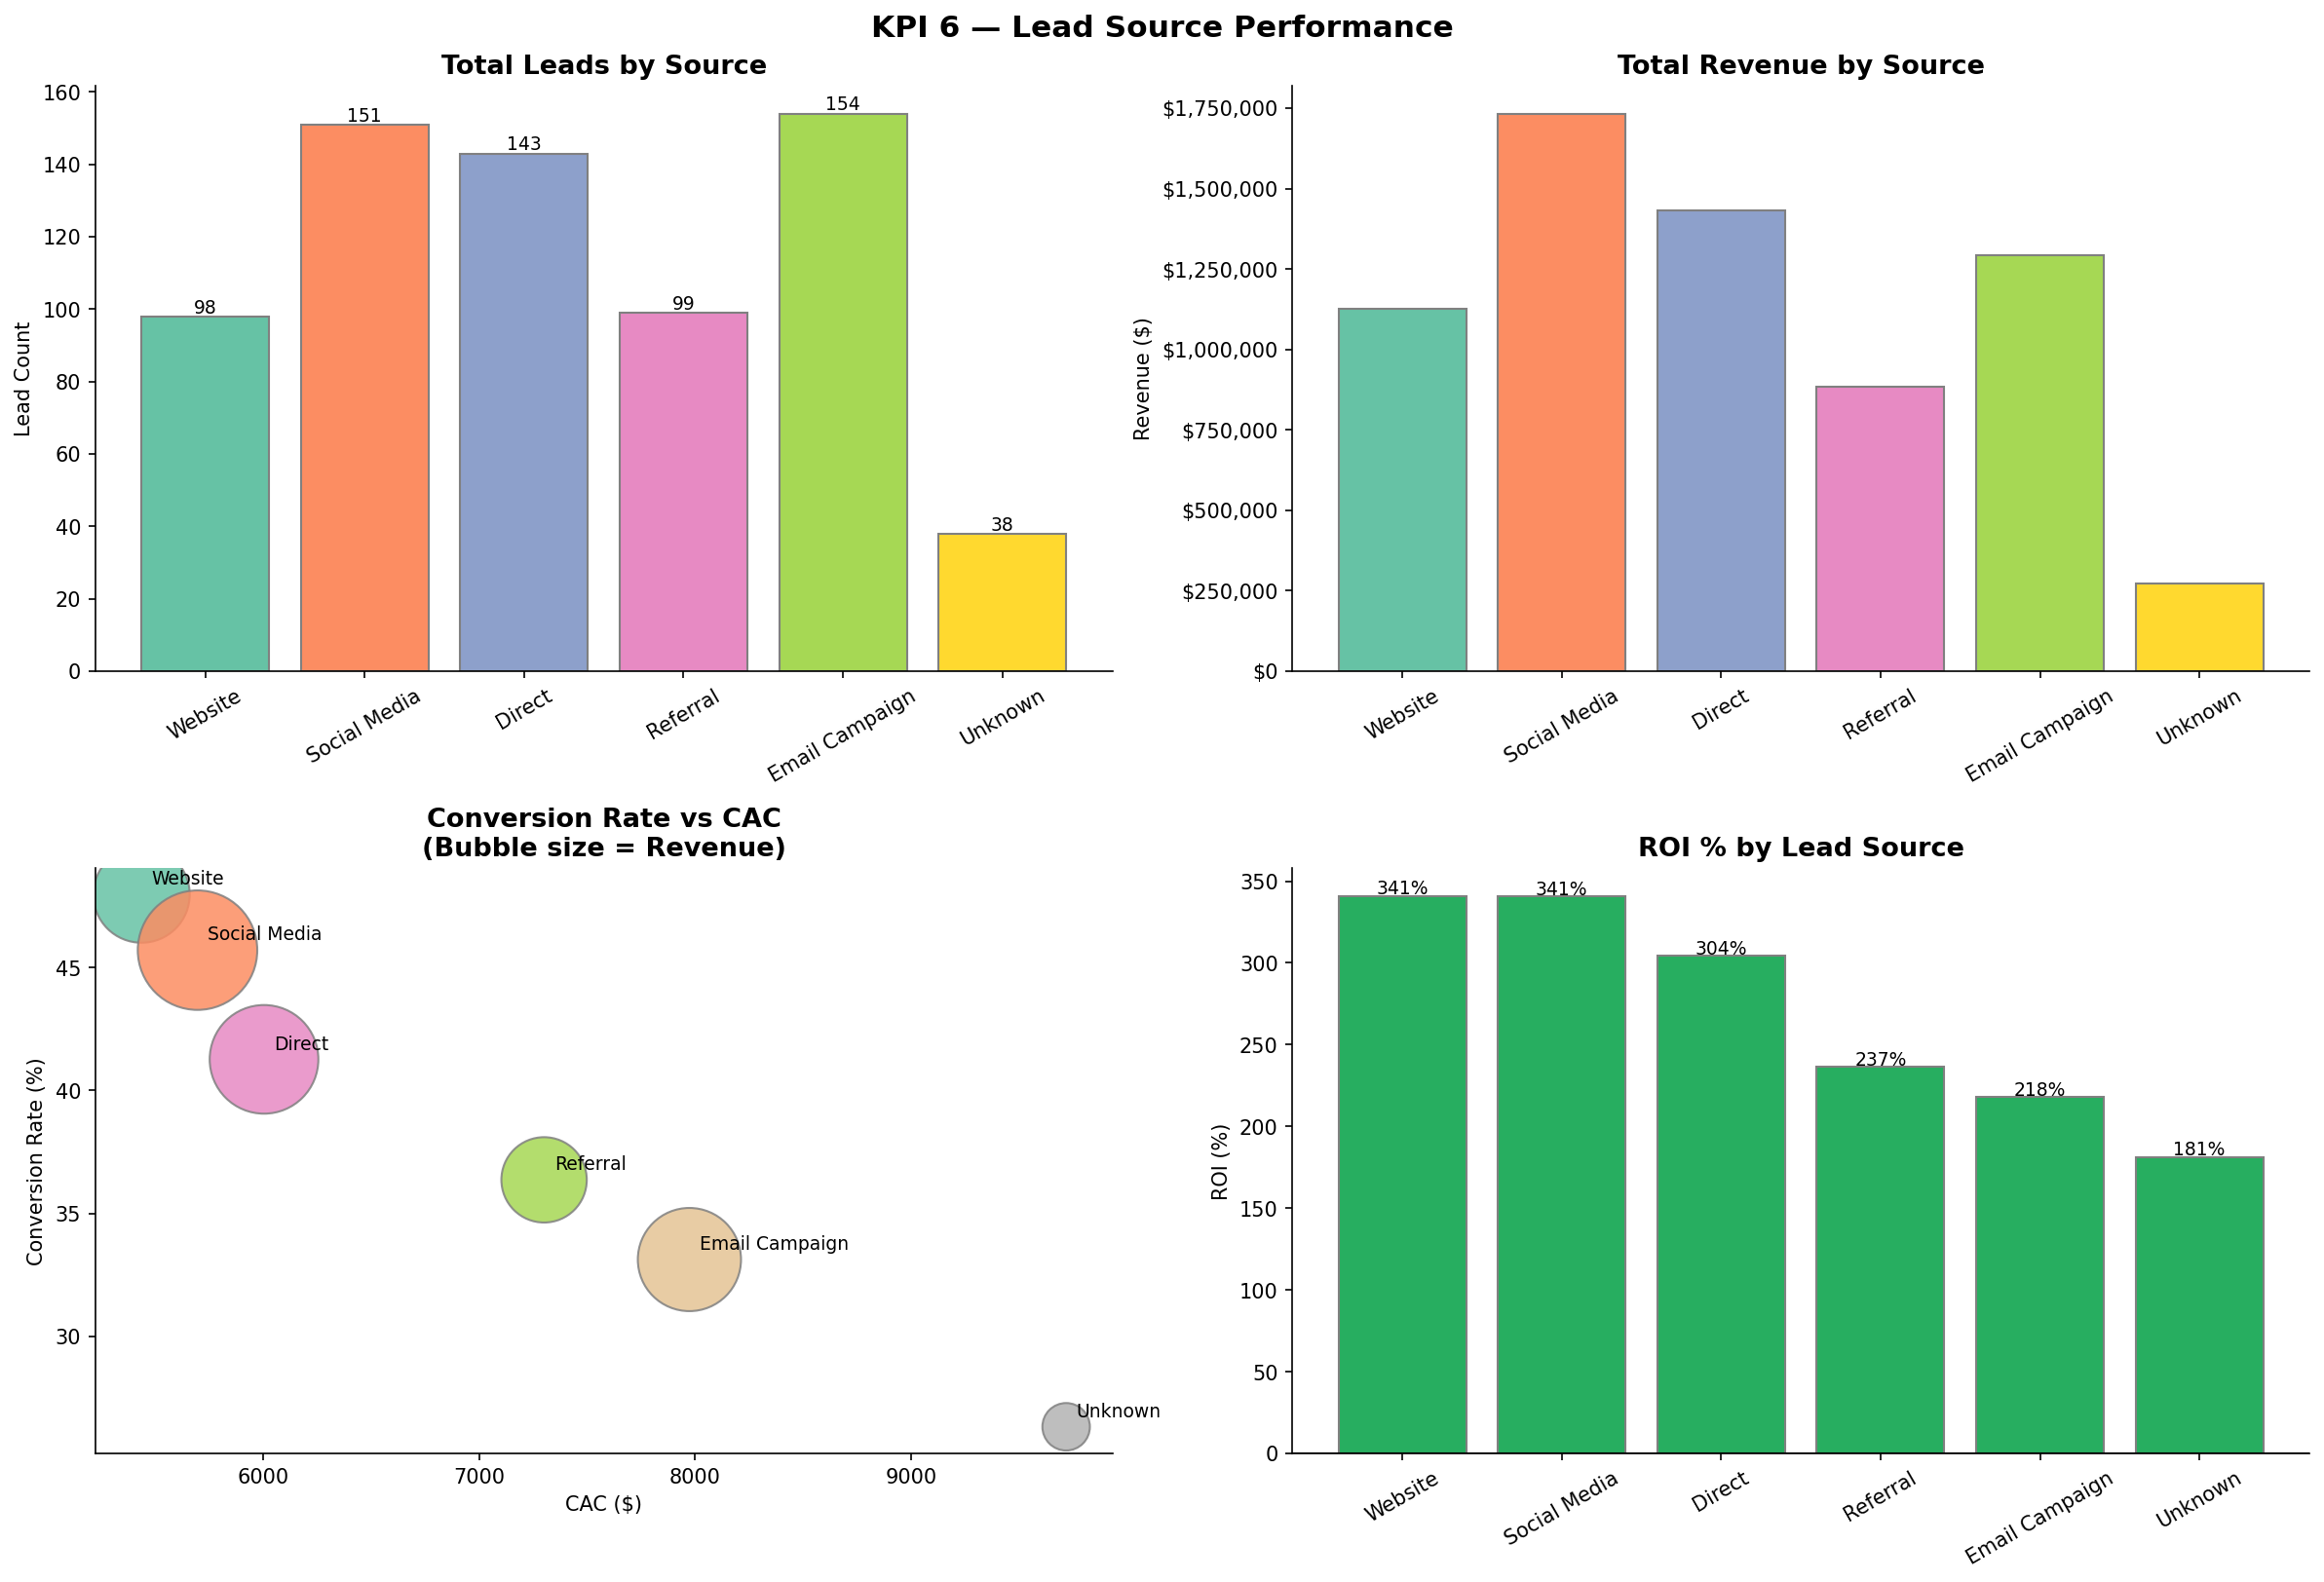

KPI 6 chart saved


In [18]:
# ── Visualization: KPI 6 ──
fig, axes = plt.subplots(2, 2, figsize=(16, 11))
fig.suptitle('KPI 6 — Lead Source Performance', fontsize=15, fontweight='bold')

sources   = lead_source_perf['Lead_Source']
palette   = sns.color_palette("Set2", len(sources))

# Chart 1: Total leads by source
axes[0, 0].bar(sources, lead_source_perf['Total_Leads'], color=palette, edgecolor='gray')
axes[0, 0].set_title('Total Leads by Source')
axes[0, 0].set_ylabel('Lead Count')
axes[0, 0].tick_params(axis='x', rotation=30)
for i, v in enumerate(lead_source_perf['Total_Leads']):
    axes[0, 0].text(i, v + 1, str(v), ha='center', fontsize=9)

# Chart 2: Total revenue by source
axes[0, 1].bar(sources, lead_source_perf['Total_Revenue'], color=palette, edgecolor='gray')
axes[0, 1].set_title('Total Revenue by Source')
axes[0, 1].set_ylabel('Revenue ($)')
axes[0, 1].yaxis.set_major_formatter(mticker.FuncFormatter(lambda v, _: f'${v:,.0f}'))
axes[0, 1].tick_params(axis='x', rotation=30)

# Chart 3: Conversion rate vs CAC scatter
scatter = axes[1, 0].scatter(
    lead_source_perf['CAC'],
    lead_source_perf['Conversion_Rate_%'],
    s=lead_source_perf['Total_Revenue'] / 500,
    c=range(len(lead_source_perf)),
    cmap='Set2', alpha=0.85, edgecolors='gray'
)
for _, row in lead_source_perf.iterrows():
    axes[1, 0].annotate(row['Lead_Source'],
                        (row['CAC'], row['Conversion_Rate_%']),
                        textcoords='offset points', xytext=(5, 5), fontsize=9)
axes[1, 0].set_xlabel('CAC ($)')
axes[1, 0].set_ylabel('Conversion Rate (%)')
axes[1, 0].set_title('Conversion Rate vs CAC\n(Bubble size = Revenue)')

# Chart 4: ROI by source
colors_roi = ['#27ae60' if v > 0 else '#e74c3c' for v in lead_source_perf['ROI_%']]
axes[1, 1].bar(sources, lead_source_perf['ROI_%'], color=colors_roi, edgecolor='gray')
axes[1, 1].axhline(y=0, color='black', linewidth=1)
axes[1, 1].set_title('ROI % by Lead Source')
axes[1, 1].set_ylabel('ROI (%)')
axes[1, 1].tick_params(axis='x', rotation=30)
for i, v in enumerate(lead_source_perf['ROI_%']):
    axes[1, 1].text(i, v + 1, f'{v:.0f}%', ha='center', fontsize=9)

plt.tight_layout()
plt.savefig('../reports/KPI6_Lead_Source_Performance.png', bbox_inches='tight')
plt.show()
print("KPI 6 chart saved")

In [21]:
# ─────────────────────────────────────────
# KPI Master Summary Table
# ─────────────────────────────────────────

kpi_summary = pd.DataFrame({
    'KPI'   : [
        'Lead Conversion Rate',
        'Customer Acquisition Cost',
        'Revenue per Client',
        'Avg Monthly Lead Growth',
        'Avg Monthly Revenue Growth',
        'Avg Sales Cycle Duration',
        'Best Performing Lead Source',
        'Highest ROI Lead Source'
    ],
    'Value' : [
        f'{overall_conv_rate:.2f}%',
        f'${overall_cac:,.2f}',
        f'${revenue_per_client:,.2f}',
        f'{avg_lead_growth:.2f}%',
        f'{avg_rev_growth:.2f}%',
        f'{overall_avg_cycle:.1f} days',
        source_conv.iloc[0]['Lead_Source'],
        lead_source_perf.sort_values("ROI_%", ascending=False).iloc[0]['Lead_Source']
    ]
})

print("=" * 55)
print("KPI SUMMARY")
print("=" * 55)
print(kpi_summary.to_string(index=False))

KPI SUMMARY
                        KPI      Value
       Lead Conversion Rate     39.82%
  Customer Acquisition Cost  $6,506.17
         Revenue per Client $24,790.74
    Avg Monthly Lead Growth      3.63%
 Avg Monthly Revenue Growth      8.83%
   Avg Sales Cycle Duration  67.7 days
Best Performing Lead Source    Website
    Highest ROI Lead Source    Website
